In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/FB stock.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,27-07-2020,231.460007,234.949997,230.830002,233.500000,233.500000,13163100.0
1,28-07-2020,234.630005,234.960007,229.830002,230.119995,230.119995,14170100.0
2,29-07-2020,231.139999,233.699997,230.309998,233.289993,233.289993,13588300.0
3,30-07-2020,230.220001,234.889999,229.000000,234.500000,234.500000,20615300.0
4,31-07-2020,255.820007,255.850006,249.000000,253.669998,253.669998,53005100.0


In [ ]:
df.shape

(251, 7)

In [ ]:
df.isnull().sum()

Date         16
Open         16
High         16
Low          16
Close        16
Adj Close    16
Volume       16
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df_1=df.reset_index()['Close']
df_1

0      233.500000
1      230.119995
2      233.289993
3      234.500000
4      253.669998
          ...    
230    343.179993
231    341.369995
232    355.640015
233    351.890015
234    347.709991
Name: Close, Length: 235, dtype: float64

In [ ]:
df_1.shape

(235,)

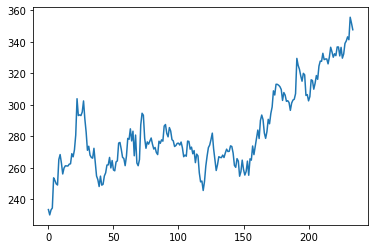

In [ ]:
plt.plot(df_1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
df_1=scaler.fit_transform(np.array(df_1).reshape(-1,1))

In [ ]:
df_1.shape

(235, 1)

In [ ]:
int(len(df_1)*0.65)

152

In [ ]:
train_data=df_1[:int(len(df_1)*0.65),]
test_data=df_1[len(train_data):,]

In [ ]:
print(len(train_data))
train_data

152


array([[0.02692802],
       [0.        ],
       [0.02525492],
       [0.03489487],
       [0.1876195 ],
       [0.17399624],
       [0.1570268 ],
       [0.15137028],
       [0.28011471],
       [0.30529   ],
       [0.26195028],
       [0.20721802],
       [0.23717348],
       [0.24840653],
       [0.24792854],
       [0.2472913 ],
       [0.25669213],
       [0.25868384],
       [0.30983117],
       [0.29389746],
       [0.32879233],
       [0.40391973],
       [0.58787442],
       [0.5027087 ],
       [0.50621414],
       [0.50254945],
       [0.52039513],
       [0.57664112],
       [0.48597825],
       [0.41913645],
       [0.32695987],
       [0.347355  ],
       [0.30250155],
       [0.29071052],
       [0.28704584],
       [0.33699818],
       [0.26609296],
       [0.19678145],
       [0.17853729],
       [0.14364242],
       [0.19622372],
       [0.15057366],
       [0.15463672],
       [0.19678145],
       [0.21271517],
       [0.25231046],
       [0.25318669],
       [0.290

In [ ]:
print(len(test_data))
test_data

83


array([[0.21924805],
       [0.27214785],
       [0.20068514],
       [0.28377939],
       [0.27708726],
       [0.34862972],
       [0.30497126],
       [0.34759399],
       [0.3916507 ],
       [0.42933402],
       [0.38639255],
       [0.47793165],
       [0.50525816],
       [0.48207457],
       [0.41443604],
       [0.38734853],
       [0.42144667],
       [0.48358829],
       [0.4611217 ],
       [0.51314527],
       [0.54604842],
       [0.6277087 ],
       [0.60659658],
       [0.6610101 ],
       [0.66045236],
       [0.65599094],
       [0.64866158],
       [0.63448058],
       [0.57919057],
       [0.61902485],
       [0.6059591 ],
       [0.57456966],
       [0.5778361 ],
       [0.56843527],
       [0.52899923],
       [0.56572657],
       [0.58094329],
       [0.58516571],
       [0.61328871],
       [0.791826  ],
       [0.75653264],
       [0.7366155 ],
       [0.70299535],
       [0.67638608],
       [0.71622036],
       [0.7087315 ],
       [0.60428612],
       [0.608

In [ ]:
def create_dataset(dataset,timestep):
    dataX, dataY=[],[]
    for i in range(len(dataset)-timestep-1):   #(range(0, 944))
        a=dataset[i:(i+timestep),0]            #If timestep=100, in 1st row 0 to 99 values is appended...2nd row 1 to 100 is appended...           
        dataX.append(a)
        dataY.append(dataset[(i+timestep),0])  #(output) In 1st row 100th value is appended...2nd row 101 value is appended...
    return np.array(dataX),np.array(dataY)

In [ ]:
X_train, y_train=create_dataset(train_data,50)
X_test, y_test=create_dataset(test_data,50)

In [ ]:
print(X_train.shape),  print(y_train.shape)

(101, 50)
(101,)


(None, None)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
model=Sequential()
model.add(LSTM(25,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(25,return_sequences=True))
model.add(LSTM(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 25)            2700      
_________________________________________________________________
lstm_4 (LSTM)                (None, 50, 25)            5100      
_________________________________________________________________
lstm_5 (LSTM)                (None, 25)                5100      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 12,926
Trainable params: 12,926
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30,verbose=1)

Epoch 1/30
4/4 [==============================] - 6s 427ms/step - loss: 0.0931 - val_loss: 0.3772
Epoch 2/30
4/4 [==============================] - 0s 61ms/step - loss: 0.0348 - val_loss: 0.1270
Epoch 3/30
4/4 [==============================] - 0s 68ms/step - loss: 0.0072 - val_loss: 0.0241
Epoch 4/30
4/4 [==============================] - 0s 71ms/step - loss: 0.0135 - val_loss: 0.0800
Epoch 5/30
4/4 [==============================] - 0s 64ms/step - loss: 0.0054 - val_loss: 0.1523
Epoch 6/30
4/4 [==============================] - 0s 63ms/step - loss: 0.0081 - val_loss: 0.1608
Epoch 7/30
4/4 [==============================] - 0s 63ms/step - loss: 0.0069 - val_loss: 0.1221
Epoch 8/30
4/4 [==============================] - 0s 60ms/step - loss: 0.0049 - val_loss: 0.0865
Epoch 9/30
4/4 [==============================] - 0s 63ms/step - loss: 0.0058 - val_loss: 0.0875
Epoch 10/30
4/4 [==============================] - 0s 60ms/step - loss: 0.0053 - val_loss: 0.1107
Epoch 11/30
4/4 [===========

In [ ]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [ ]:
train_pred=scaler.inverse_transform(train_pred)
test_pred=scaler.inverse_transform(test_pred)

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(y_train,train_pred))

268.9370049012484

In [ ]:
math.sqrt(mean_squared_error(y_test,test_pred))

286.00620225028723

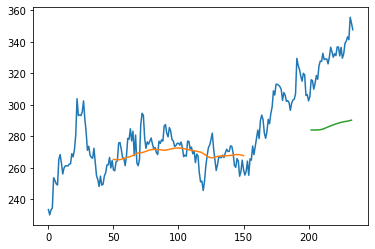

In [ ]:

### Plotting 
# shift train predictions for plotting
look_back=50
trainPredictPlot = np.empty_like(df_1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df_1)-1, :] = test_pred
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()